**Отчёт о проделанной работе**

Самая удачная посылка у меня оказалась изначально самая первая - минимум предобработки данных (заполнить всё средними/медианами), простой catboost и here we go. После этого я много посылок не могла побить свою же самую первую. Я пыталась 
- подтюнить модель, запускать исследования с помощью оптуны 
- скейлить данные с помощью standard scaler 
- пробовать другие модели
- создавать новые фичи/вернуть фичи которые я удаляла по тем или иным причинам. например я пробовала создавать фичу places где суммировала все "места" которые есть вокруг квартиры (кофейни/рестораны/больницы и т.п.). Изначально я дропала название района, потом пыталась вернуть с мыслями о том, что конкретный район явно делает наценку квартире. 

В итоге больше всего помогла для побития бейзлайна более адекватная предобработка данных - а именно заполнять наны медианными значениями, сгруппированными по каждому району и в трейне, и в тесте 

In [28]:
import numpy as np 
import pandas as pd 

train_df = pd.read_csv('train_aimasters.csv')

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27232 entries, 0 to 27231
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      27232 non-null  float64
 1   road_distance_1                    27232 non-null  float64
 2   road_distance_2                    27232 non-null  float64
 3   year_of_construction               27232 non-null  float64
 4   bulvar_ring_km                     27232 non-null  float64
 5   bus_station_distance               27232 non-null  float64
 6   cafe_count                         27232 non-null  int64  
 7   fitness_center_distance            27232 non-null  float64
 8   floor                              27232 non-null  float64
 9   district_population                27232 non-null  int64  
 10  total_area                         27232 non-null  int64  
 11  green_part                         27232 non-null  flo

In [35]:
train_df['year_of_construction']=train_df.groupby('district_name')['year_of_construction'].apply(lambda x:x.fillna(x.median()))
train_df['floor']=train_df.groupby('district_name')['floor'].apply(lambda x:x.fillna(x.median()))
train_df['kitchen_area']=train_df.groupby('district_name')['kitchen_area'].apply(lambda x:x.fillna(x.median()))
train_df['living_area']=train_df.groupby('district_name')['living_area'].apply(lambda x:x.fillna(x.median()))
train_df['wall_material']=train_df.groupby('district_name')['wall_material'].apply(lambda x:x.fillna(x.median()))
train_df['floors_num']=train_df.groupby('district_name')['floors_num'].apply(lambda x:x.fillna(x.median()))
train_df['rooms_num']=train_df.groupby('district_name')['rooms_num'].apply(lambda x:x.fillna(x.median()))
train_df['state']=train_df.groupby('district_name')['state'].apply(lambda x:x.fillna(x.median()))

/opt/python/envs/default/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [37]:
train_df['metro_minutes'].fillna(train_df['metro_minutes'].median(), inplace=True)
train_df['state'].fillna(train_df['state'].median(), inplace=True)

In [39]:
corr_matrix = train_df.corr()

corr_matrix.style.background_gradient(cmap='coolwarm')

district_area 
 road_distance_1 
 road_distance_2 
 year_of_construction 
 bulvar_ring_km 
 bus_station_distance 
 cafe_count 
 fitness_center_distance 
 floor 
 district_population 
 total_area 
 green_part 
 green_zone_distance 
 healthcare_centers_count 
 id 
 kitchen_area 
 kremlin_distance 
 leisure_count 
 living_area 
 market_count 
 wall_material 
 floors_num 
 metro_minutes 
 mkad_distance 
 rooms_num 
 office_count 
 park_distance 
 result_price 
 public_transport_station_distance 
 sadovoe_km 
 base_school_distance 
 sport_count 
 state 
 malls_count 
 railway_station_distance 
 
 
 
 
 district_area 
 1.000000 
 0.042915 
 0.305551 
 -0.003875 
 0.537123 
 0.402828 
 -0.225554 
 0.542679 
 -0.004007 
 -0.162225 
 0.057579 
 0.558786 
 0.014818 
 -0.321600 
 0.038218 
 -0.041212 
 0.527172 
 -0.194609 
 0.082378 
 -0.448592 
 -0.029456 
 -0.048037 
 0.546013 
 0.268895 
 -0.050918 
 -0.214410 
 0.488915 
 -0.164442 
 0.610324 
 0.534252 
 0.736677 
 -0.413469 
 -0.390616 
 -0.446947 
 0.573811 
 
 
 road_distance_1 
 0.042915 
 1.000000 
 0.450977 
 0.000299 
 0.229741 
 0.144286 
 0.014329 
 0.078892 
 0.023079 
 0.022961 
 0.011402 
 0.078786 
 0.031231 
 0.058834 
 -0.013436 
 -0.019940 
 0.223237 
 0.054371 
 0.015871 
 -0.122933 
 -0.058943 
 0.016996 
 0.155677 
 0.252174 
 -0.029222 
 0.009063 
 0.195860 
 -0.106939 
 0.088238 
 0.239196 
 -0.001595 
 -0.095021 
 -0.137028 
 -0.116493 
 0.275810 
 
 
 road_distance_2 
 0.305551 
 0.450977 
 1.000000 
 0.000599 
 0.546228 
 0.445751 
 -0.186712 
 0.382267 
 0.017396 
 -0.127102 
 0.030860 
 0.381191 
 0.046406 
 -0.153051 
 0.035897 
 -0.027924 
 0.537140 
 -0.144342 
 0.041429 
 -0.256374 
 -0.053833 
 0.024070 
 0.516710 
 0.503968 
 -0.065323 
 -0.185701 
 0.588418 
 -0.157413 
 0.246483 
 0.550046 
 0.431434 
 -0.329681 
 -0.227762 
 -0.333983 
 0.572452 
 
 
 year_of_construction 
 -0.003875 
 0.000299 
 0.000599 
 1.000000 
 -0.005278 
 -0.001739 
 0.001817 
 -0.003882 
 0.000417 
 -0.000306 
 -0.002637 
 -0.003733 
 -0.000481 
 0.006906 
 -0.003001 
 0.000943 
 -0.005522 
 -0.000418 
 -0.002466 
 0.006406 
 -0.002947 
 -0.000216 
 -0.003309 
 0.001412 
 -0.007941 
 0.000634 
 -0.002958 
 0.002647 
 -0.000865 
 -0.005532 
 -0.002673 
 0.005247 
 0.228323 
 0.004756 
 -0.004514 
 
 
 bulvar_ring_km 
 0.537123 
 0.229741 
 0.546228 
 -0.005278 
 1.000000 
 0.692125 
 -0.573243 
 0.590039 
 0.063518 
 -0.124104 
 0.037143 
 0.472421 
 0.022600 
 -0.457399 
 0.039777 
 -0.039103 
 0.998779 
 -0.524993 
 0.060044 
 -0.728809 
 -0.103104 
 0.083389 
 0.777431 
 0.365587 
 -0.083303 
 -0.566274 
 0.790753 
 -0.275252 
 0.455655 
 0.998466 
 0.578957 
 -0.826837 
 -0.326184 
 -0.790684 
 0.969754 
 
 
 bus_station_distance 
 0.402828 
 0.144286 
 0.445751 
 -0.001739 
 0.692125 
 1.000000 
 -0.292485 
 0.536351 
 -0.010637 
 -0.177224 
 0.036047 
 0.355168 
 -0.063735 
 -0.301777 
 0.066403 
 -0.026017 
 0.696013 
 -0.279144 
 0.048462 
 -0.542407 
 -0.018770 
 0.035701 
 0.775201 
 0.523171 
 -0.042274 
 -0.286678 
 0.749981 
 -0.158080 
 0.498534 
 0.701396 
 0.562250 
 -0.432096 
 -0.199016 
 -0.432667 
 0.668860 
 
 
 cafe_count 
 -0.225554 
 0.014329 
 -0.186712 
 0.001817 
 -0.573243 
 -0.292485 
 1.000000 
 -0.215532 
 -0.048322 
 0.003698 
 0.030658 
 -0.396136 
 -0.042037 
 0.324942 
 0.001914 
 0.004422 
 -0.587961 
 0.983963 
 0.013138 
 0.484679 
 0.093514 
 -0.057157 
 -0.208385 
 0.316870 
 0.069416 
 0.992719 
 -0.250044 
 0.232190 
 -0.088300 
 -0.549513 
 -0.140822 
 0.853728 
 0.066648 
 0.798472 
 -0.523623 
 
 
 fitness_center_distance 
 0.542679 
 0.078892 
 0.382267 
 -0.003882 
 0.590039 
 0.536351 
 -0.215532 
 1.000000 
 -0.010329 
 -0.078722 
 0.046501 
 0.288727 
 0.094303 
 -0.333488 
 0.058619 
 -0.055227 
 0.588008 
 -0.184088 
 0.064951 
 -0.418375 
 0.002065 
 0.012884 
 0.598102 
 0.482661 
 -0.084338 
 -0.198750 
 0.639547 
 -0.185135 
 0.675467 
 0.592269 
 0.730063 
 -0.414039 
 -0.365771 
 -0.449131 
 0.653631 
 
 
 floor 
 -

In [40]:
train_df.drop(['timestamp'], axis=1, inplace=True)

In [41]:
train_df.drop(['district_name'], axis=1, inplace=True)

In [42]:
cat_columns = ['product_type']
train_df_new = pd.get_dummies(train_df, cat_columns)

In [43]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27232 entries, 0 to 27231
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      27232 non-null  float64
 1   road_distance_1                    27232 non-null  float64
 2   road_distance_2                    27232 non-null  float64
 3   year_of_construction               27232 non-null  float64
 4   bulvar_ring_km                     27232 non-null  float64
 5   bus_station_distance               27232 non-null  float64
 6   cafe_count                         27232 non-null  int64  
 7   fitness_center_distance            27232 non-null  float64
 8   floor                              27232 non-null  float64
 9   district_population                27232 non-null  int64  
 10  total_area                         27232 non-null  int64  
 11  green_part                         27232 non-null  flo

In [12]:
pip install catboost

     |████████████████████████████████| 76.6 MB 14 kB/s              
     |████████████████████████████████| 47 kB 3.7 MB/s             
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import catboost as cb 

In [45]:
target = train_df_new['result_price']
data = train_df_new.drop(['result_price'], axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=42)

In [47]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [48]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

95:	learn: 3066449.0809662	test: 2829384.0005020	best: 2829384.0005020 (95)	total: 345ms	remaining: 374ms
96:	learn: 3059819.0337465	test: 2827804.3886023	best: 2827804.3886023 (96)	total: 348ms	remaining: 370ms
97:	learn: 3054871.0774753	test: 2823086.6274899	best: 2823086.6274899 (97)	total: 352ms	remaining: 366ms
98:	learn: 3049652.7438175	test: 2818899.4289436	best: 2818899.4289436 (98)	total: 355ms	remaining: 363ms
99:	learn: 3042641.0045016	test: 2813994.0646591	best: 2813994.0646591 (99)	total: 359ms	remaining: 359ms
100:	learn: 3038523.7749625	test: 2810338.4535686	best: 2810338.4535686 (100)	total: 363ms	remaining: 355ms
101:	learn: 3034141.4472251	test: 2807997.1772771	best: 2807997.1772771 (101)	total: 366ms	remaining: 352ms
102:	learn: 3029492.1740380	test: 2803639.3954431	best: 2803639.3954431 (102)	total: 370ms	remaining: 348ms
103:	learn: 3024632.6041091	test: 2798883.9070724	best: 2798883.9070724 (103)	total: 373ms	remaining: 345ms
104:	learn: 3018187.9422549	test: 2794

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

Testing performance
RMSE: 2483831.50282
R2: 0.69781


In [55]:
cross_val_score(model, X_test, y_test)

0:	learn: 4312729.5082019	total: 4.54ms	remaining: 904ms
1:	learn: 4108143.9173920	total: 8.39ms	remaining: 830ms
2:	learn: 3938522.4840742	total: 12.2ms	remaining: 804ms
3:	learn: 3778689.4883173	total: 16.2ms	remaining: 796ms
4:	learn: 3642783.6523246	total: 20.3ms	remaining: 791ms
5:	learn: 3507156.4364131	total: 24.1ms	remaining: 778ms
6:	learn: 3392550.9197725	total: 27.8ms	remaining: 767ms
7:	learn: 3298131.8667075	total: 31.5ms	remaining: 757ms
8:	learn: 3203064.9852645	total: 35.3ms	remaining: 750ms
9:	learn: 3122053.9658847	total: 39.3ms	remaining: 746ms
10:	learn: 3043437.0911928	total: 43ms	remaining: 739ms
11:	learn: 2987353.1333290	total: 46.9ms	remaining: 735ms
12:	learn: 2929950.2579502	total: 50.6ms	remaining: 728ms
13:	learn: 2873144.0264795	total: 54.3ms	remaining: 721ms
14:	learn: 2818548.0450664	total: 58.2ms	remaining: 718ms
15:	learn: 2779001.2989518	total: 61.9ms	remaining: 712ms
16:	learn: 2737454.6188611	total: 65.7ms	remaining: 708ms
17:	learn: 2706180.1328465

array([0.66818798, 0.68259037, 0.61194728, 0.6698641 , 0.59771054])

In [56]:
rmsle = mean_squared_log_error(y_test, pred)
print('RMSLE: {:.5f}'.format(rmsle))

RMSLE: 0.22227


Text(0.5, 1.0, 'Feature Importance')

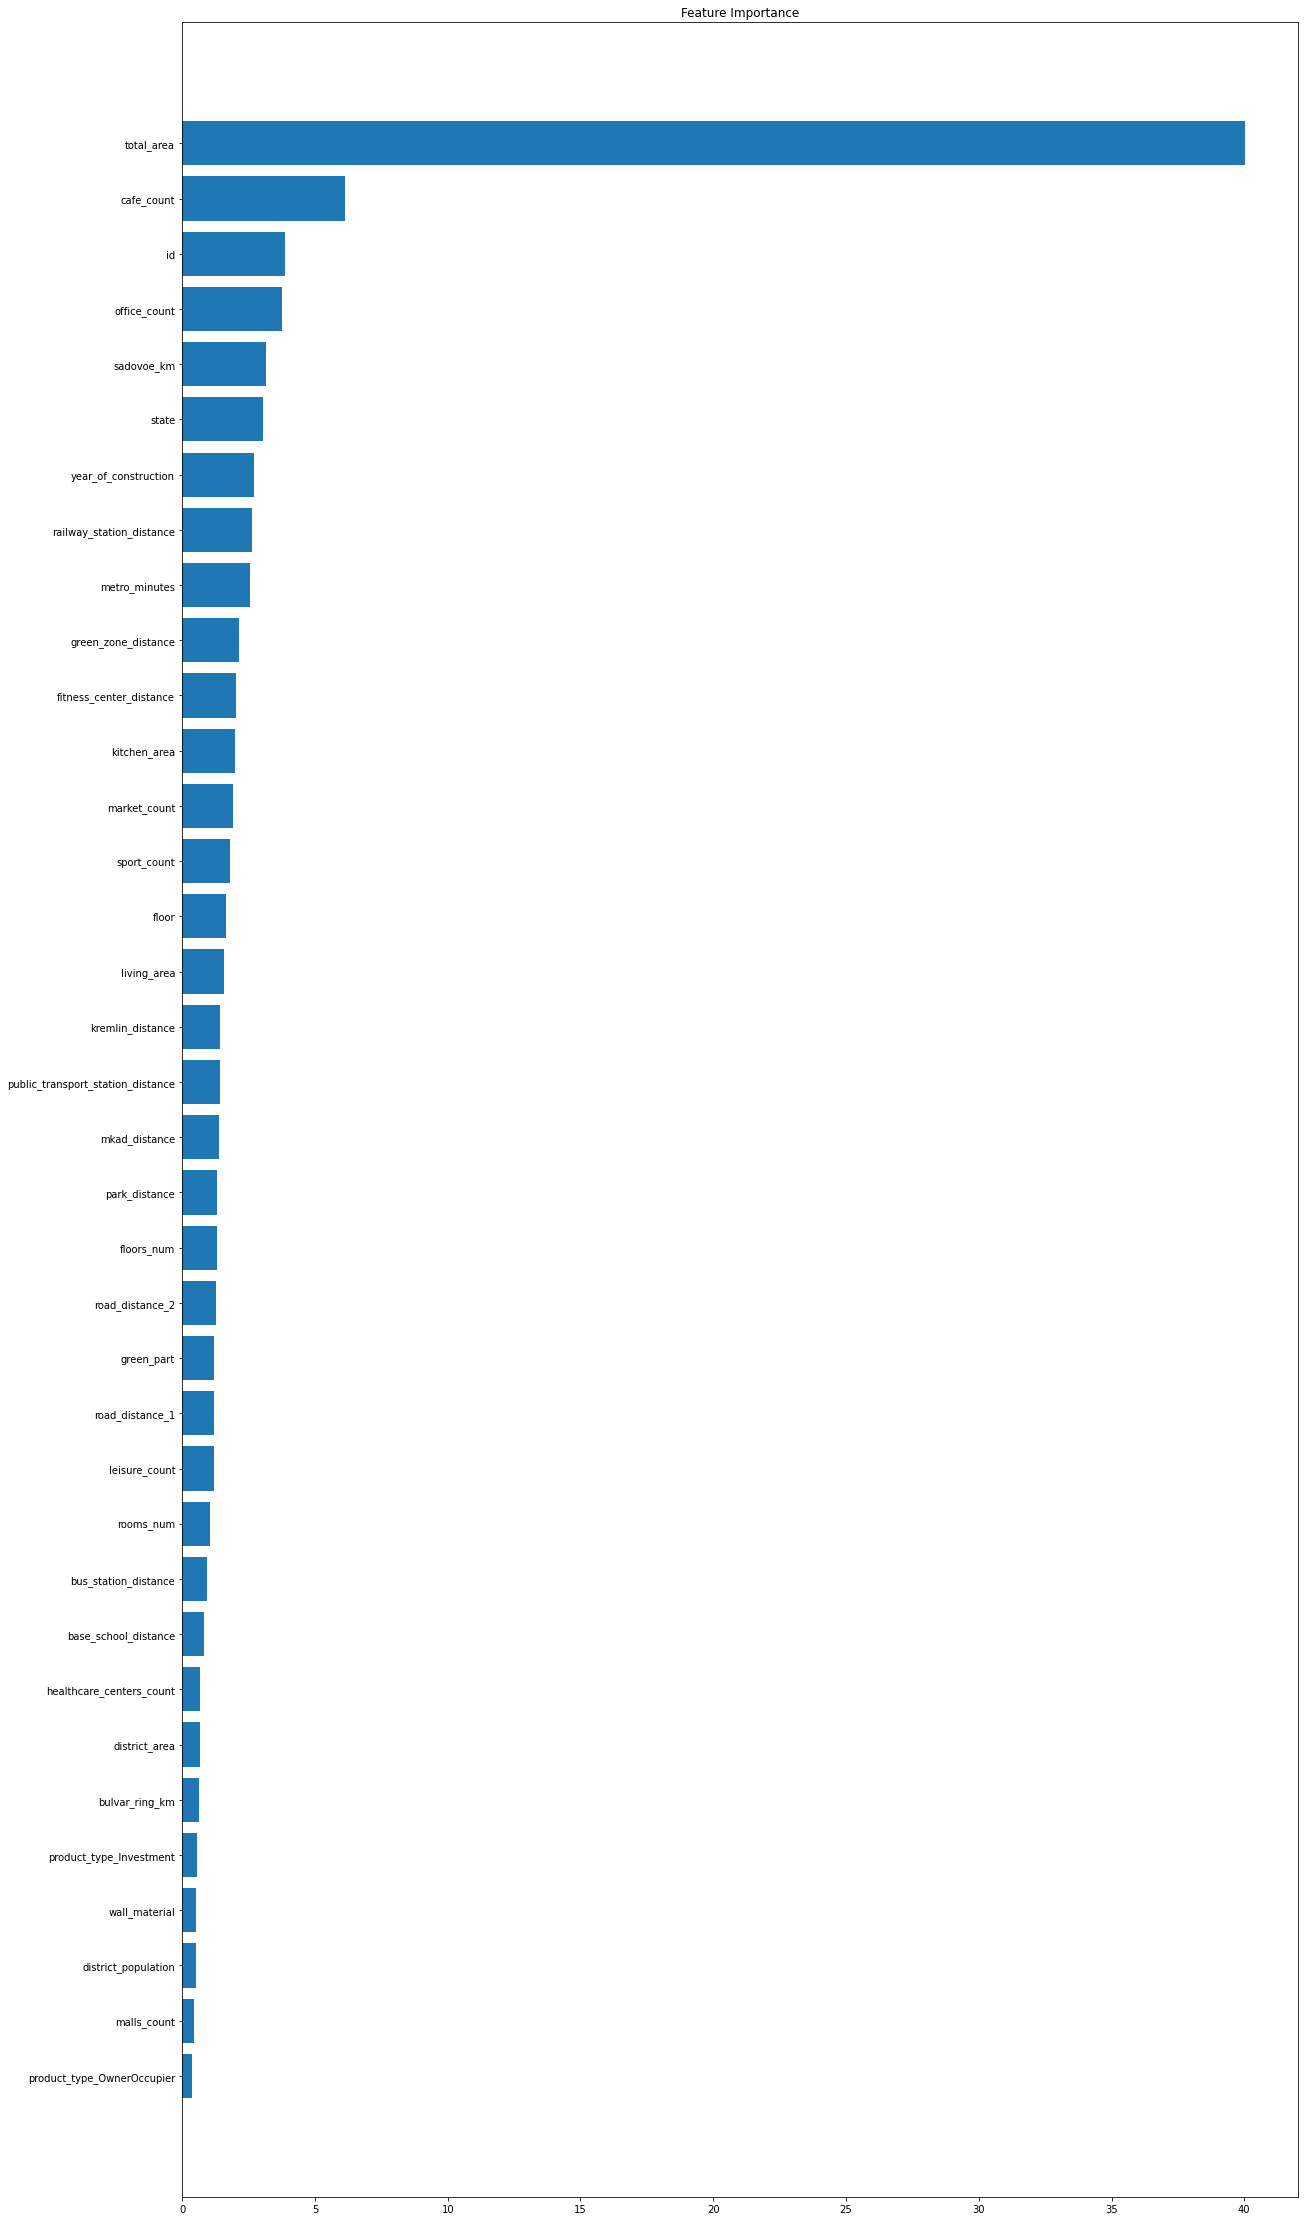

In [59]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 40))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [57]:
test_df = pd.read_csv('test (1).csv')
test_df.head(5)

district_area 
 road_distance_1 
 road_distance_2 
 year_of_construction 
 bulvar_ring_km 
 bus_station_distance 
 cafe_count 
 fitness_center_distance 
 floor 
 district_population 
 ... 
 product_type 
 public_transport_station_distance 
 sadovoe_km 
 base_school_distance 
 sport_count 
 state 
 district_name 
 timestamp 
 malls_count 
 railway_station_distance 
 
 
 
 
 0 
 25536296.81 
 2.808077 
 3.688405 
 NaN 
 21.038561 
 17.366661 
 20 
 1.519553 
 15.0 
 17790 
 ... 
 OwnerOccupier 
 7.560163 
 19.868997 
 1.234235 
 11 
 NaN 
 Poselenie Vnukovskoe 
 2015-01-05 
 4 
 25.699461 
 
 
 1 
 25536296.81 
 2.959485 
 3.474052 
 NaN 
 21.352564 
 17.845449 
 20 
 1.884939 
 2.0 
 17790 
 ... 
 OwnerOccupier 
 3.357039 
 20.183980 
 1.545730 
 10 
 1.0 
 Poselenie Vnukovskoe 
 2015-01-06 
 4 
 26.054344 
 
 
 2 
 40366999.51 
 0.478623 
 6.886762 
 0.0 
 22.548909 
 15.269596 
 14 
 1.869427 
 24.0 
 7341 
 ... 
 OwnerOccupier 
 1.603221 
 21.380555 
 3.532680 
 8 
 1.0 
 Poselenie Moskovskij 
 2015-01-10 
 3 
 30.927687 
 
 
 3 
 66772450.69 
 1.444098 
 4.585951 
 NaN 
 21.833697 
 12.909037 
 14 
 1.080227 
 8.0 
 13890 
 ... 
 OwnerOccupier 
 10.128646 
 20.670206 
 3.419971 
 7 
 NaN 
 Poselenie Sosenskoe 
 2015-01-10 
 3 
 24.613188 
 
 
 4 
 5704502.19 
 0.630552 
 1.422580 
 1989.0 
 5.519649 
 7.835220 
 611 
 1.305352 
 9.0 
 1362363 
 ... 
 Investment 
 1.949641 
 4.377551 
 0.728850 
 105 
 3.0 
 Akademicheskoe 
 2015-01-10 
 44 
 7.911929 
 
 
 
 5 rows × 37 columns

In [68]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      3239 non-null   float64
 1   road_distance_1                    3239 non-null   float64
 2   road_distance_2                    3239 non-null   float64
 3   year_of_construction               3239 non-null   float64
 4   bulvar_ring_km                     3239 non-null   float64
 5   bus_station_distance               3239 non-null   float64
 6   cafe_count                         3239 non-null   int64  
 7   fitness_center_distance            3239 non-null   float64
 8   floor                              3239 non-null   float64
 9   district_population                3239 non-null   int64  
 10  total_area                         3239 non-null   int64  
 11  green_part                         3239 non-null   float

In [67]:
test_df['year_of_construction']=test_df.groupby('district_name')['year_of_construction'].apply(lambda x:x.fillna(x.median()))
test_df['floor']=test_df.groupby('district_name')['floor'].apply(lambda x:x.fillna(x.median()))
test_df['kitchen_area']=test_df.groupby('district_name')['kitchen_area'].apply(lambda x:x.fillna(x.median()))
test_df['living_area']=test_df.groupby('district_name')['living_area'].apply(lambda x:x.fillna(x.median()))
test_df['wall_material']=test_df.groupby('district_name')['wall_material'].apply(lambda x:x.fillna(x.median()))
test_df['floors_num']=test_df.groupby('district_name')['floors_num'].apply(lambda x:x.fillna(x.median()))
test_df['rooms_num']=test_df.groupby('district_name')['rooms_num'].apply(lambda x:x.fillna(x.median()))
test_df['state']=test_df.groupby('district_name')['state'].apply(lambda x:x.fillna(x.median()))
test_df['metro_minutes'].fillna(test_df['metro_minutes'].median(), inplace=True)
test_df['state'].fillna(test_df['state'].median(), inplace=True)
test_df['living_area'].fillna(test_df['living_area'].median(), inplace=True)
test_df['year_of_construction'].fillna(test_df['year_of_construction'].median(), inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/python/envs/default/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      3239 non-null   float64
 1   road_distance_1                    3239 non-null   float64
 2   road_distance_2                    3239 non-null   float64
 3   year_of_construction               3239 non-null   float64
 4   bulvar_ring_km                     3239 non-null   float64
 5   bus_station_distance               3239 non-null   float64
 6   cafe_count                         3239 non-null   int64  
 7   fitness_center_distance            3239 non-null   float64
 8   floor                              3239 non-null   float64
 9   district_population                3239 non-null   int64  
 10  total_area                         3239 non-null   int64  
 11  green_part                         3239 non-null   float

In [69]:
test_df.drop(['district_name'], axis=1, inplace=True)
test_df.drop(['timestamp'], axis=1, inplace=True)

In [70]:
cat_columns = ['product_type']
test_df_new = pd.get_dummies(test_df, cat_columns)

In [71]:
test_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      3239 non-null   float64
 1   road_distance_1                    3239 non-null   float64
 2   road_distance_2                    3239 non-null   float64
 3   year_of_construction               3239 non-null   float64
 4   bulvar_ring_km                     3239 non-null   float64
 5   bus_station_distance               3239 non-null   float64
 6   cafe_count                         3239 non-null   int64  
 7   fitness_center_distance            3239 non-null   float64
 8   floor                              3239 non-null   float64
 9   district_population                3239 non-null   int64  
 10  total_area                         3239 non-null   int64  
 11  green_part                         3239 non-null   float

In [72]:
subs = model.predict(test_df_new)

In [30]:
samp_subs = pd.read_csv('sample_submission.csv')
samp_subs.head(5)

id 
 result_price 
 
 
 
 
 0 
 27235 
 64104 
 
 
 1 
 27236 
 9746 
 
 
 2 
 27237 
 17640 
 
 
 3 
 27238 
 40390 
 
 
 4 
 27239 
 76229

In [73]:
subs = pd.DataFrame(subs)
subs['result_price'] = subs[0]

In [74]:
subs.drop(0, axis=1, inplace=True)

In [75]:
id = pd.DataFrame(test_df_new['id'])

In [76]:
sub1 = pd.concat([id, subs], axis=1)

In [77]:
sub1.to_csv('/data/notebook_files/sub15.csv', index=False)

In [78]:
pd.read_csv('sub15.csv')

id 
 result_price 
 
 
 
 
 0 
 27235 
 5.172526e+06 
 
 
 1 
 27236 
 5.101672e+06 
 
 
 2 
 27237 
 1.096165e+07 
 
 
 3 
 27238 
 5.327414e+06 
 
 
 4 
 27239 
 9.189330e+06 
 
 
 ... 
 ... 
 ... 
 
 
 3234 
 30469 
 7.132714e+06 
 
 
 3235 
 30470 
 1.853593e+07 
 
 
 3236 
 30471 
 5.490346e+06 
 
 
 3237 
 30472 
 9.720269e+06 
 
 
 3238 
 30473 
 5.849089e+06 
 
 
 
 3239 rows × 2 columns

# здесь заканчивается решение 

дальше идут старые эксперименты 

In [40]:
pip install optuna

     |████████████████████████████████| 365 kB 20.2 MB/s            
     |████████████████████████████████| 210 kB 40.4 MB/s            
     |████████████████████████████████| 78 kB 14.5 MB/s            
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install xgboost 

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost
import optuna

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
model = xgboost.XGBRegressor()

# Fit the model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
y_pred = model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSLE:', mean_squared_log_error(y_test, y_pred))

MSE:  8516919596199.592
RMSE:  2918376.191685985
RMSLE: 0.22312042372124152


In [98]:
import math

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    model = xgboost.XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [99]:
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)

[I 2023-02-14 18:25:19,207] A new study created in memory with name: regression
[I 2023-02-14 18:25:20,190] Trial 0 finished with value: 10210652908726.78 and parameters: {'max_depth': 1, 'learning_rate': 0.3621360720856711, 'n_estimators': 175, 'min_child_weight': 6, 'gamma': 0.686012868267285, 'subsample': 0.409667939457874, 'colsample_bytree': 0.30151671180263734, 'reg_alpha': 0.9131434087591985, 'reg_lambda': 0.18023358370446751, 'random_state': 772}. Best is trial 0 with value: 10210652908726.78.
[I 2023-02-14 18:25:30,650] Trial 1 finished with value: 15955935757201.79 and parameters: {'max_depth': 5, 'learning_rate': 0.8568757664344497, 'n_estimators': 556, 'min_child_weight': 1, 'gamma': 0.04374876106972864, 'subsample': 0.556380985073926, 'colsample_bytree': 0.40813737695580904, 'reg_alpha': 0.19268122980376393, 'reg_lambda': 0.8540081283211082, 'random_state': 326}. Best is trial 0 with value: 10210652908726.78.
[I 2023-02-14 18:25:39,851] Trial 2 finished with value: 9759707

KeyboardInterrupt: KeyboardInterrupt: 

In [100]:
print('Best parameters', study.best_params)
print('Best value', study.best_value)
print('Best trial', study.best_trial)

Best parameters {'max_depth': 6, 'learning_rate': 0.011857261170135533, 'n_estimators': 830, 'min_child_weight': 2, 'gamma': 0.06953898894175314, 'subsample': 0.21818260787662322, 'colsample_bytree': 0.8745988515434037, 'reg_alpha': 0.07793986069327322, 'reg_lambda': 0.47319593025479506, 'random_state': 151}
Best value 7928792937894.7295
Best trial FrozenTrial(number=31, state=TrialState.COMPLETE, values=[7928792937894.7295], datetime_start=datetime.datetime(2023, 2, 14, 18, 49, 10, 527615), datetime_complete=datetime.datetime(2023, 2, 14, 18, 50, 17, 992999), params={'max_depth': 6, 'learning_rate': 0.011857261170135533, 'n_estimators': 830, 'min_child_weight': 2, 'gamma': 0.06953898894175314, 'subsample': 0.21818260787662322, 'colsample_bytree': 0.8745988515434037, 'reg_alpha': 0.07793986069327322, 'reg_lambda': 0.47319593025479506, 'random_state': 151}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step

In [101]:
model = xgboost.XGBRegressor(**study.best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSLE:', mean_squared_log_error(y_test, y_pred))

MSE:  7928792937894.7295
RMSE:  2815811.239748632
RMSLE: 0.22456542310069894


In [106]:
subs = model.predict(test_df_new)
subs = pd.DataFrame(subs)
subs

0 
 
 
 
 
 0 
 5231501.0 
 
 
 1 
 4998760.0 
 
 
 2 
 9175790.0 
 
 
 3 
 4931373.5 
 
 
 4 
 9240053.0 
 
 
 ... 
 ... 
 
 
 3234 
 6985473.5 
 
 
 3235 
 20508734.0 
 
 
 3236 
 5435476.5 
 
 
 3237 
 9762748.0 
 
 
 3238 
 6269984.0 
 
 
 
 3239 rows × 1 columns

In [107]:
subs['result_price'] = subs[0]
subs.drop(0, axis=1, inplace=True)
id = pd.DataFrame(test_df_new['id'])
sub1 = pd.concat([id, subs], axis=1)
sub1.to_csv('/data/notebook_files/sub3.csv', index=False)
pd.read_csv('sub3.csv')

id 
 result_price 
 
 
 
 
 0 
 27235 
 5231501.0 
 
 
 1 
 27236 
 4998760.0 
 
 
 2 
 27237 
 9175790.0 
 
 
 3 
 27238 
 4931373.5 
 
 
 4 
 27239 
 9240053.0 
 
 
 ... 
 ... 
 ... 
 
 
 3234 
 30469 
 6985473.5 
 
 
 3235 
 30470 
 20508734.0 
 
 
 3236 
 30471 
 5435476.5 
 
 
 3237 
 30472 
 9762748.0 
 
 
 3238 
 30473 
 6269984.0 
 
 
 
 3239 rows × 2 columns

<AxesSubplot:>

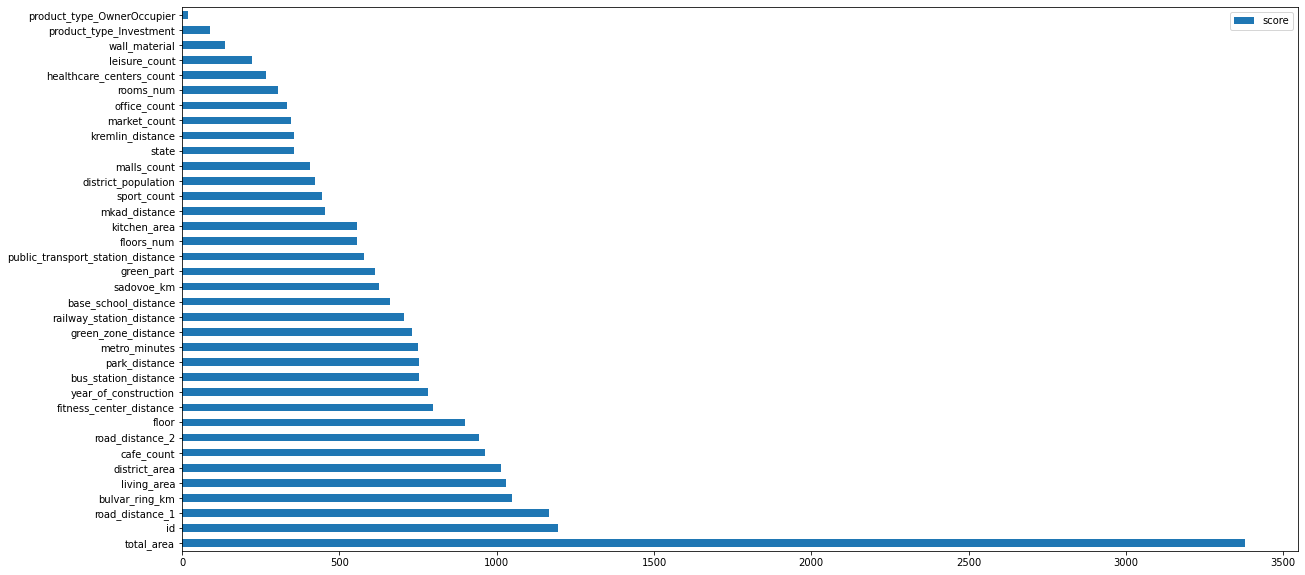

In [108]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [2]:
pip install optuna

^C
ERROR: Operation cancelled by user
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#давай по новой миша всё хуйня 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna as optuna
import statsmodels.api as sm
import scipy.stats as stats
import optuna.integration.lightgbm as lgb
import lightgbm as lg
import time as time

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, Dataset, train, early_stopping, log_evaluation
from catboost import CatBoostRegressor, CatBoostClassifier, Pool, cv
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [3]:
df = pd.read_csv('train_aimasters.csv')
df.head()

district_area 
 road_distance_1 
 road_distance_2 
 year_of_construction 
 bulvar_ring_km 
 bus_station_distance 
 cafe_count 
 fitness_center_distance 
 floor 
 district_population 
 ... 
 product_type 
 public_transport_station_distance 
 sadovoe_km 
 base_school_distance 
 sport_count 
 state 
 district_name 
 timestamp 
 malls_count 
 railway_station_distance 
 
 
 
 
 0 
 6.407578e+06 
 1.422391 
 3.830951 
 NaN 
 13.675657 
 24.292406 
 152 
 0.485841 
 4.0 
 86206 
 ... 
 Investment 
 3.299822 
 13.100618 
 0.177975 
 52 
 NaN 
 Bibirevo 
 2011-08-20 
 52 
 14.231961 
 
 
 1 
 9.589337e+06 
 2.887377 
 3.103996 
 NaN 
 8.132640 
 5.706113 
 177 
 0.668364 
 3.0 
 76284 
 ... 
 Investment 
 0.783160 
 6.444333 
 0.273345 
 66 
 NaN 
 Nagatinskij Zaton 
 2011-08-23 
 40 
 9.242586 
 
 
 2 
 4.808270e+06 
 0.647250 
 2.927487 
 NaN 
 8.054252 
 6.710302 
 122 
 0.733101 
 2.0 
 101982 
 ... 
 Investment 
 3.945073 
 6.963403 
 0.158072 
 67 
 NaN 
 Tekstil'shhiki 
 2011-08-27 
 35 
 9.540544 
 
 
 3 
 1.258354e+07 
 2.677824 
 2.780449 
 NaN 
 18.309433 
 6.734618 
 61 
 0.623484 
 9.0 
 21155 
 ... 
 Investment 
 1.579164 
 17.457198 
 0.236455 
 26 
 NaN 
 Mitino 
 2011-09-01 
 22 
 17.478380 
 
 
 4 
 8.398461e+06 
 1.721834 
 3.133531 
 NaN 
 0.787593 
 1.423428 
 2283 
 0.220288 
 4.0 
 28179 
 ... 
 Investment 
 0.857764 
 0.046810 
 0.376838 
 195 
 NaN 
 Basmannoe 
 2011-09-05 
 114 
 1.595898 
 
 
 
 5 rows × 38 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27232 entries, 0 to 27231
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      27232 non-null  float64
 1   road_distance_1                    27232 non-null  float64
 2   road_distance_2                    27232 non-null  float64
 3   year_of_construction               14314 non-null  float64
 4   bulvar_ring_km                     27232 non-null  float64
 5   bus_station_distance               27232 non-null  float64
 6   cafe_count                         27232 non-null  int64  
 7   fitness_center_distance            27232 non-null  float64
 8   floor                              27065 non-null  float64
 9   district_population                27232 non-null  int64  
 10  total_area                         27232 non-null  int64  
 11  green_part                         27232 non-null  flo

In [5]:
df.drop(['year_of_construction'], axis=1, inplace=True)
df.drop(['district_name'], axis=1, inplace=True)
df.drop(['timestamp'], axis=1, inplace=True)

In [6]:
df.drop(['state'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27232 entries, 0 to 27231
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      27232 non-null  float64
 1   road_distance_1                    27232 non-null  float64
 2   road_distance_2                    27232 non-null  float64
 3   bulvar_ring_km                     27232 non-null  float64
 4   bus_station_distance               27232 non-null  float64
 5   cafe_count                         27232 non-null  int64  
 6   fitness_center_distance            27232 non-null  float64
 7   floor                              27065 non-null  float64
 8   district_population                27232 non-null  int64  
 9   total_area                         27232 non-null  int64  
 10  green_part                         27232 non-null  float64
 11  green_zone_distance                27232 non-null  flo

In [8]:
df['floor'].fillna(df['floor'].mode()[0], inplace=True)
df['living_area'].fillna(df['living_area'].mode()[0], inplace=True)
df.drop(['rooms_num'], axis=1, inplace=True)

In [9]:
df['metro_minutes'].fillna(df['floor'].mode()[0], inplace=True)
df.drop(['wall_material'], axis=1, inplace=True)
df.drop(['floors_num'], axis=1, inplace=True)
df.drop(['kitchen_area'], axis=1, inplace=True)

In [10]:
cat_columns = ['product_type']
train = pd.get_dummies(df, cat_columns)

In [11]:
X = train.drop(['result_price'], axis=1)
y = train['result_price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_val)

rmse_result = pd.DataFrame(index=['Train', 'Test', 'Diff'], columns=['LightGBM', 'XGBoost', 'CatBoost'])
rmse_result.iloc[0, 0] = mean_squared_error(np.log(y_pred), np.log(y_val))**0.5
rmse_result

LightGBM 
 XGBoost 
 CatBoost 
 
 
 
 
 Train 
 0.479723 
 NaN 
 NaN 
 
 
 Test 
 NaN 
 NaN 
 NaN 
 
 
 Diff 
 NaN 
 NaN 
 NaN

In [19]:
pred = lgbm.predict(X_val)
mean_squared_error(y_val, pred)
#mean_squared_log_error(y_val, pred)

7180082445702.842

In [20]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_val)

mean_squared_error(y_val, y_pred)
#mean_squared_log_error(y_val, y_pred)

7238363037591.112

In [21]:
ctb = CatBoostRegressor()
ctb.fit(X_train, y_train, verbose=False)
y_pred = ctb.predict(X_val)

In [22]:
mean_squared_error(y_val, y_pred)
mean_squared_log_error(y_val, y_pred)

0.2242778817449741

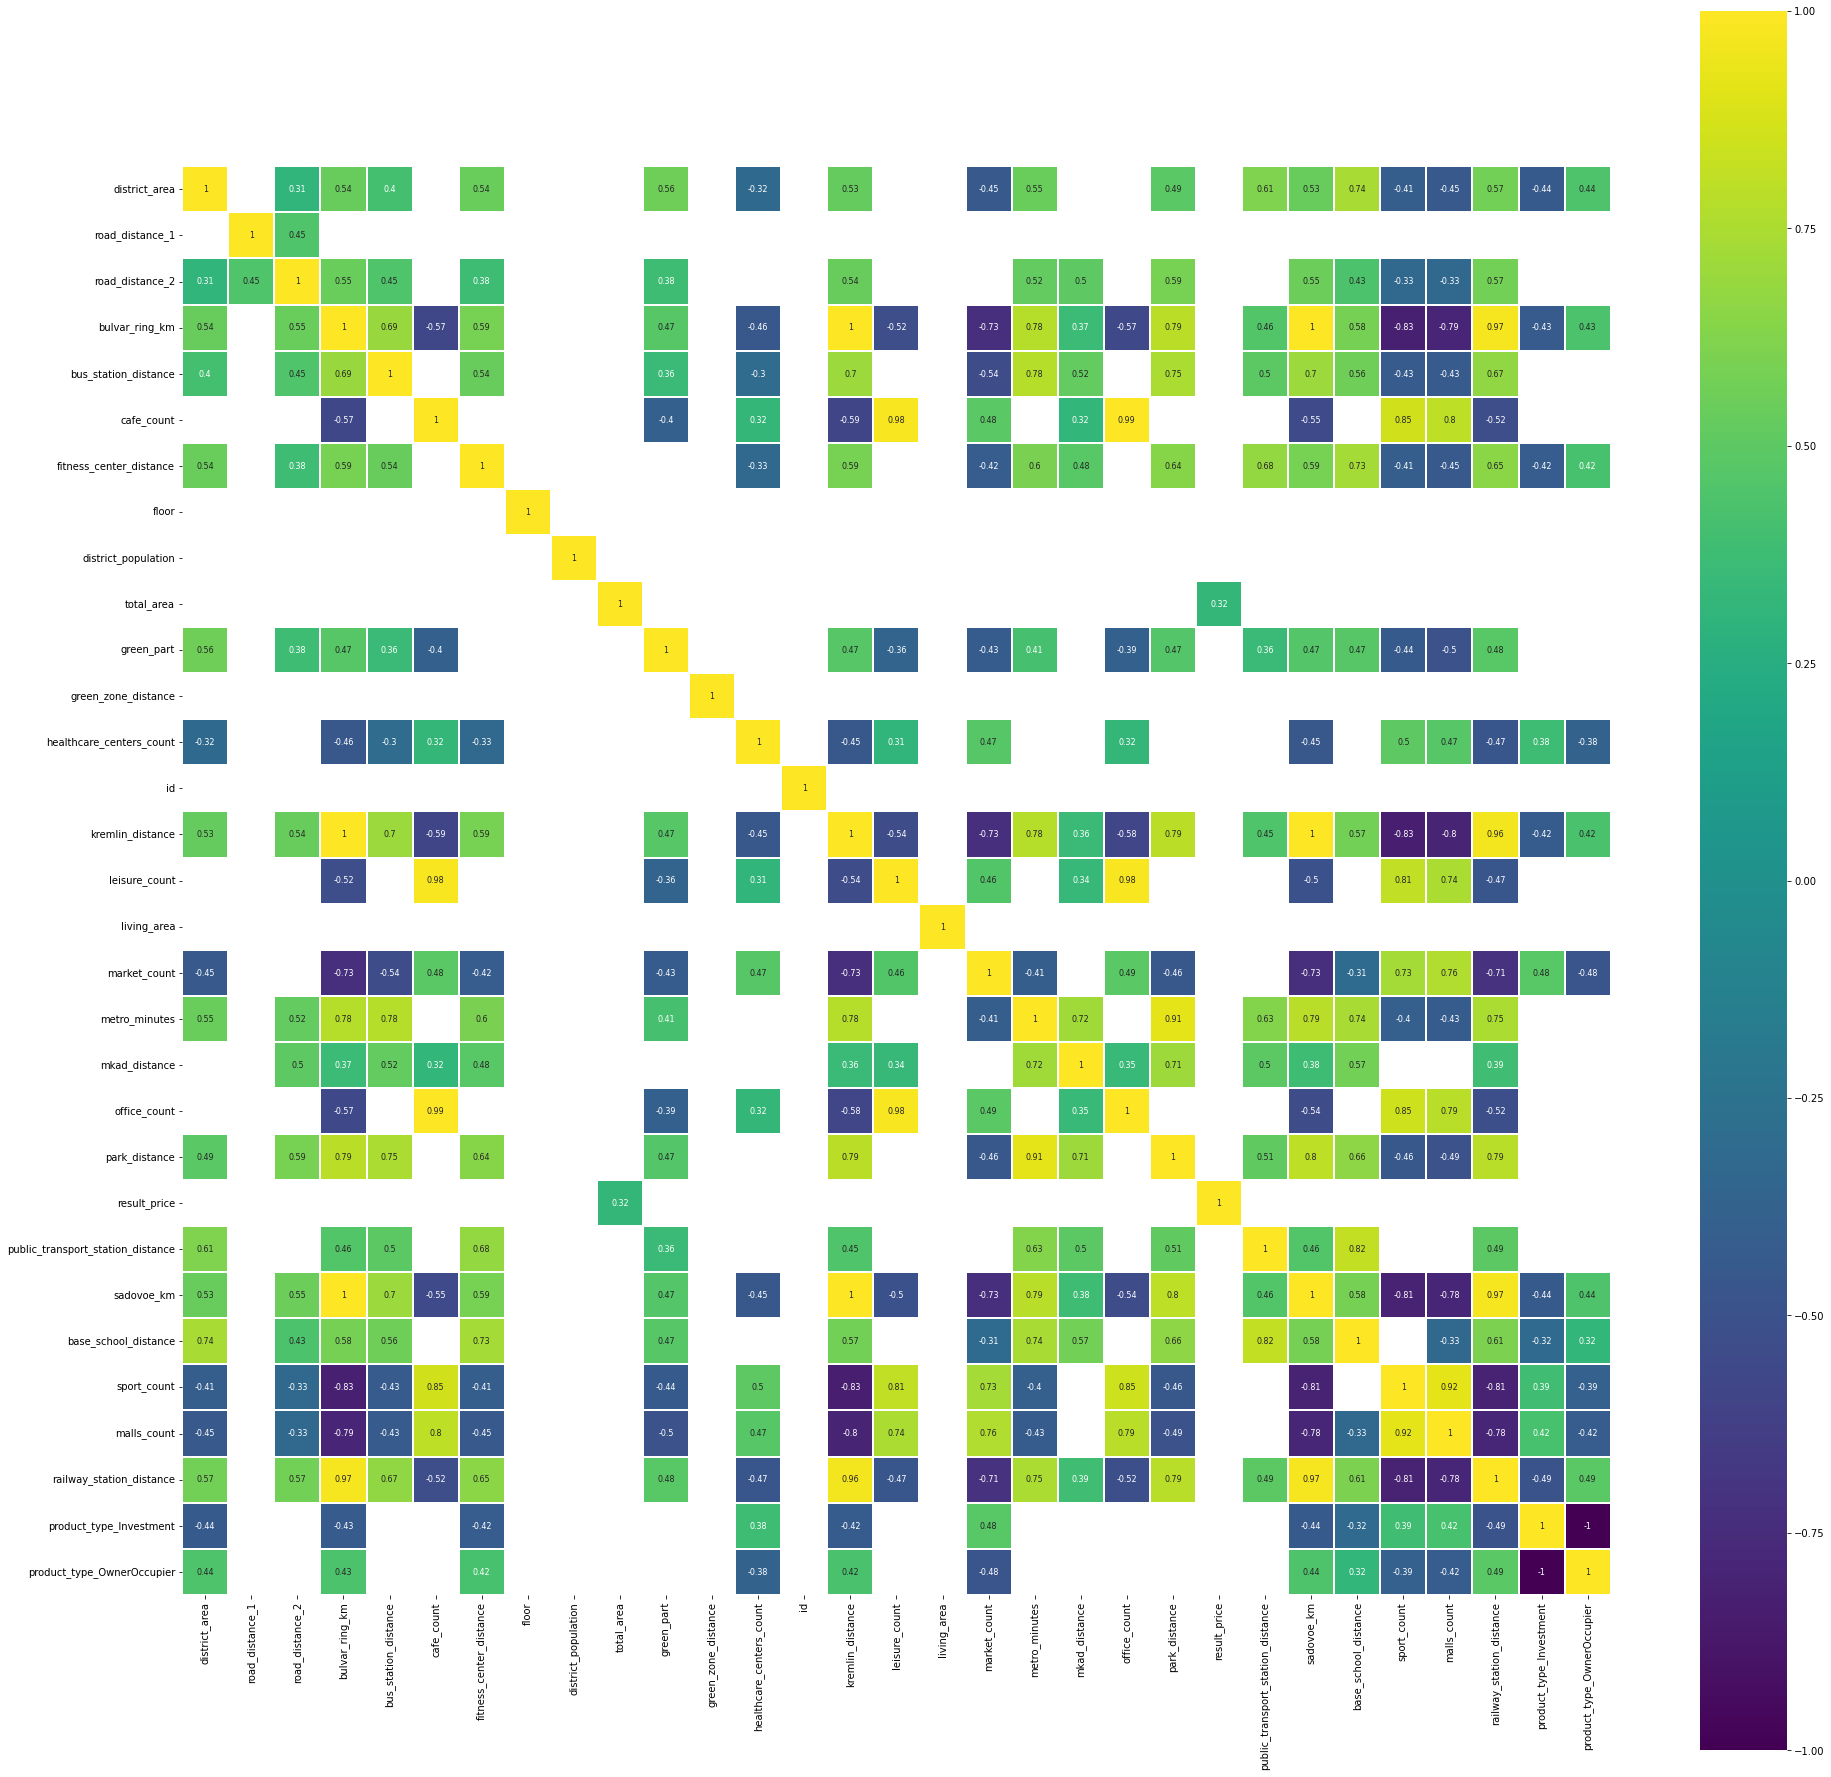

In [23]:
corr_matrix = train.corr()

plt.figure(figsize=(32, 32))
sns.heatmap(corr_matrix[(corr_matrix >= 0.3) | (corr_matrix <= -0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [24]:
corr_feat_feat = corr_matrix.stack().reset_index()
corr_feat_feat.columns = ['Feat_1', 'Feat_2', 'Corr']
corr_feat_feat['Corr_abs'] = abs(corr_feat_feat['Corr'])
corr_feat_feat = corr_feat_feat.drop_duplicates(subset=['Corr'])
corr_feat_feat[(corr_feat_feat['Feat_1'] != 'SalePrice') & (corr_feat_feat['Feat_2'] != 'SalePrice')\
                & (corr_feat_feat['Feat_1'] != corr_feat_feat['Feat_2'])].sort_values('Corr_abs', ascending=False).head(40)

Feat_1 
 Feat_2 
 Corr 
 Corr_abs 
 
 
 
 
 929 
 product_type_Investment 
 product_type_OwnerOccupier 
 -1.000000 
 1.000000 
 
 
 107 
 bulvar_ring_km 
 kremlin_distance 
 0.998779 
 0.998779 
 
 
 117 
 bulvar_ring_km 
 sadovoe_km 
 0.998466 
 0.998466 
 
 
 458 
 kremlin_distance 
 sadovoe_km 
 0.997563 
 0.997563 
 
 
 175 
 cafe_count 
 office_count 
 0.992719 
 0.992719 
 
 
 170 
 cafe_count 
 leisure_count 
 0.983963 
 0.983963 
 
 
 485 
 leisure_count 
 office_count 
 0.979683 
 0.979683 
 
 
 121 
 bulvar_ring_km 
 railway_station_distance 
 0.969754 
 0.969754 
 
 
 772 
 sadovoe_km 
 railway_station_distance 
 0.968819 
 0.968819 
 
 
 462 
 kremlin_distance 
 railway_station_distance 
 0.964835 
 0.964835 
 
 
 833 
 sport_count 
 malls_count 
 0.921429 
 0.921429 
 
 
 579 
 metro_minutes 
 park_distance 
 0.914750 
 0.914750 
 
 
 181 
 cafe_count 
 sport_count 
 0.853728 
 0.853728 
 
 
 646 
 office_count 
 sport_count 
 0.850834 
 0.850834 
 
 
 460 
 kremlin_distance 
 sport_count 
 -0.830837 
 0.830837 
 
 
 119 
 bulvar_ring_km 
 sport_count 
 -0.826837 
 0.826837 
 
 
 738 
 public_transport_station_distance 
 base_school_distance 
 0.817067 
 0.817067 
 
 
 770 
 sadovoe_km 
 sport_count 
 -0.811933 
 0.811933 
 
 
 834 
 sport_count 
 railway_station_distance 
 -0.810504 
 0.810504 
 
 
 491 
 leisure_count 
 sport_count 
 0.805725 
 0.805725 
 
 
 461 
 kremlin_distance 
 malls_count 
 -0.798834 
 0.798834 
 
 
 182 
 cafe_count 
 malls_count 
 0.798472 
 0.798472 
 
 
 675 
 park_distance 
 sadovoe_km 
 0.797833 
 0.797833 
 
 
 455 
 kremlin_distance 
 park_distance 
 0.792277 
 0.792277 
 
 
 114 
 bulvar_ring_km 
 park_distance 
 0.790753 
 0.790753 
 
 
 120 
 bulvar_ring_km 
 malls_count 
 -0.790684 
 0.790684 
 
 
 647 
 office_count 
 malls_count 
 0.786982 
 0.786982 
 
 
 582 
 metro_minutes 
 sadovoe_km 
 0.785953 
 0.785953 
 
 
 679 
 park_distance 
 railway_station_distance 
 0.785336 
 0.785336 
 
 
 865 
 malls_count 
 railway_station_distance 
 -0.784109 
 0.784109 
 
 
 771 
 sadovoe_km 
 malls_count 
 -0.781306 
 0.781306 
 
 
 452 
 kremlin_distance 
 metro_minutes 
 0.777626 
 0.777626 
 
 
 111 
 bulvar_ring_km 
 metro_minutes 
 0.777511 
 0.777511 
 
 
 142 
 bus_station_distance 
 metro_minutes 
 0.775209 
 0.775209 
 
 
 554 
 market_count 
 malls_count 
 0.764750 
 0.764750 
 
 
 145 
 bus_station_distance 
 park_distance 
 0.749981 
 0.749981 
 
 
 586 
 metro_minutes 
 railway_station_distance 
 0.748878 
 0.748878 
 
 
 492 
 leisure_count 
 malls_count 
 0.744791 
 0.744791 
 
 
 25 
 district_area 
 base_school_distance 
 0.736677 
 0.736677 
 
 
 583 
 metro_minutes 
 base_school_distance 
 0.736593 
 0.736593

In [25]:
train.drop(['kremlin_distance'], axis=1, inplace=True)
train.drop(['sadovoe_km'], axis=1, inplace=True)
train.drop(['cafe_count'], axis=1, inplace=True)
train.drop(['railway_station_distance'], axis=1, inplace=True)

In [26]:
X = train.drop(['result_price'], axis=1)
y = train['result_price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_val)

In [28]:
mean_squared_log_error(y_val, y_pred)

0.22932284538871528

In [29]:
train_set = Dataset(X_train, label=y_train, free_raw_data=False)
valid_set = Dataset(X_val, label=y_val, free_raw_data=False)

params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
}

lgbm_train = lg.train(params, train_set=train_set, valid_sets=[valid_set])
y_pred = lgbm_train.predict(X_val)

[1]	valid_0's rmse: 4.34218e+06
[2]	valid_0's rmse: 4.12571e+06
[3]	valid_0's rmse: 3.93173e+06
[4]	valid_0's rmse: 3.77284e+06
[5]	valid_0's rmse: 3.63637e+06
[6]	valid_0's rmse: 3.51821e+06
[7]	valid_0's rmse: 3.41995e+06
[8]	valid_0's rmse: 3.33507e+06
[9]	valid_0's rmse: 3.26171e+06
[10]	valid_0's rmse: 3.20187e+06
[11]	valid_0's rmse: 3.14468e+06
[12]	valid_0's rmse: 3.09956e+06
[13]	valid_0's rmse: 3.06161e+06
[14]	valid_0's rmse: 3.02522e+06
[15]	valid_0's rmse: 2.9947e+06
[16]	valid_0's rmse: 2.96529e+06
[17]	valid_0's rmse: 2.94472e+06
[18]	valid_0's rmse: 2.92034e+06
[19]	valid_0's rmse: 2.90307e+06
[20]	valid_0's rmse: 2.88664e+06
[21]	valid_0's rmse: 2.87126e+06
[22]	valid_0's rmse: 2.86037e+06
[23]	valid_0's rmse: 2.84816e+06
[24]	valid_0's rmse: 2.83973e+06
[25]	valid_0's rmse: 2.83065e+06
[26]	valid_0's rmse: 2.82e+06
[27]	valid_0's rmse: 2.81396e+06
[28]	valid_0's rmse: 2.81044e+06
[29]	valid_0's rmse: 2.80457e+06
[30]	valid_0's rmse: 2.79795e+06
[31]	valid_0's rmse: 2.

In [30]:
mean_squared_log_error(y_val, y_pred)

0.22932284538871528

In [31]:
start = time.time()

def objective(trial, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val):
    dtrain = Dataset(X_train, label=y_train)
    dval = Dataset(X_val, label=y_val)
 
    param = {
        'objective': 'regression', # model task: regression (default), poisson, quantile, mape, gamma, binary, multiclass, multiclassova, cross_entropy, etc
        'metric': 'rmse', # metric whose value optimizes the model: l1, l2, rmse, quantile, auc, etc
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0), # l1 regularization, coefficient λ (lambda) multiplied by the sum of absolute values of weights
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0), # l2 regularization, coefficient λ (lambda) multiplied by the sum of squares of weights
        'num_leaves': trial.suggest_int('num_leaves', 2, 256), # max number of leaves in one tree
        'max_depth': trial.suggest_int('max_depth', 3, 20), # limit the max depth (count of level) for tree model
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.05,0.1]), # step of adjusting weights taking into account loss function
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 35), # minimum number of observations in a leaf that will result from splitting a node
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0), # percentage of features that will be used to train the tree in each iteration
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0), # bagging, the proportion of observations that will be used to train in each iteration
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7), # frequency of using bagging. 0 - not used, k - used every k iterations
        'boosting': 'gbdt', # boosting type, by default gbdt — traditional Gradient Boosting Decision Tree.
    }

    gbm = lg.train(param, dtrain, valid_sets=[dtrain, dval])
    y_pred = gbm.predict(X_val)
    rmse = mean_squared_error(y_pred, y_val, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
task_execution_time = (time.time() - start)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4643
[LightGBM] [Info] Number of data points in the train set: 19062, number of used features: 26
[LightGBM] [Info] Start training from score 7002835.560277
[1]	training's rmse: 4.60928e+06	valid_1's rmse: 4.51773e+06
[2]	training's rmse: 4.5418e+06	valid_1's rmse: 4.44911e+06
[3]	training's rmse: 4.47963e+06	valid_1's rmse: 4.38567e+06
[4]	training's rmse: 4.42301e+06	valid_1's rmse: 4.32726e+06
[5]	training's rmse: 4.36993e+06	valid_1's rmse: 4.27239e+06
[6]	training's rmse: 4.31245e+06	valid_1's rmse: 4.21331e+06
[7]	training's rmse: 4.26061e+06	valid_1's rmse: 4.1609e+06
[8]	training's rmse: 4.21315e+06	valid_1's rmse: 4.11273e+06
[9]	training's rmse: 4.16237e+06	valid_1's rmse: 4.06131e+06
[10]	training's rmse: 4.12273e+06	valid_1's rmse: 4.02063e+06
[11]	training's rmse: 4.07896e+06	valid_

[I 2023-02-14 21:31:18,410] A new study created in memory with name: no-name-1b851502-c0dc-4ef7-b6fa-a366b5bf91bd
<ipython-input-31-bb72ac46934b>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0), # l1 regularization, coefficient λ (lambda) multiplied by the sum of absolute values of weights
<ipython-input-31-bb72ac46934b>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0), # l2 regularization, coefficient λ (lambda) multiplied by the sum of squares of weights
<ipython-input-31-bb72ac46934b>:16: FutureWarning: suggest_uni

In [32]:
trial = study.best_trial
print('Number of finished trials:', len(study.trials))
print('\tRMSE: {}'.format(trial.value))
print('\tParams: ')
for key, value in trial.params.items():
    print('\t\t{}: {}'.format(key, value))
print('Task execution time', task_execution_time)

Number of finished trials: 100
	RMSE: 2581302.7536709406
	Params: 
		lambda_l1: 0.004804653331521507
		lambda_l2: 0.001180231678011242
		num_leaves: 114
		max_depth: 13
		learning_rate: 0.05
		min_data_in_leaf: 7
		feature_fraction: 0.42503833031278676
		bagging_fraction: 0.9289456829604111
		bagging_freq: 3
Task execution time 89.92483234405518


In [33]:
lgbm_optuna = lg.train(params=study.best_trial.params, train_set=train_set, valid_sets=valid_set, 
                    num_boost_round=1000, early_stopping_rounds=150, verbose_eval=False)
y_pred = lgbm_optuna.predict(X_val)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4643
[LightGBM] [Info] Number of data points in the train set: 19062, number of used features: 26


/opt/python/envs/default/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/python/envs/default/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [34]:
mean_squared_log_error(y_val, y_pred)

0.22496461944017274

In [35]:
start = time.time()

dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_val, label=y_val)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
}

lgbm_tuner = lgb.train(
    params,
    dtrain,
    valid_sets=[dtrain, dval],
    callbacks=[early_stopping(100), log_evaluation(100)],
)

y_pred = lgbm_tuner.predict(X_val, num_iteration=lgbm_tuner.best_iteration)
rmse = mean_squared_error(y_pred, y_val, squared=False)
best_params = lgbm_tuner.params
task_execution_time = (time.time() - start)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 2.08738e+06	valid_1's rmse: 2.67325e+06
[200]	valid_0's rmse: 1.81175e+06	valid_1's rmse: 2.65855e+06
[300]	valid_0's rmse: 1.61702e+06	valid_1's rmse: 2.65885e+06
Early stopping, best iteration is:
[278]	valid_0's rmse: 1.65448e+06	valid_1's rmse: 2.65714e+06
[100]	valid_0's rmse: 2.09233e+06	valid_1's rmse: 2.64289e+06
[200]	valid_0's rmse: 1.83642e+06	valid_1's rmse: 2.62254e+06
[300]	valid_0's rmse: 1.64634e+06	valid_1's rmse: 2.62572e+06
Early stopping, best iteration is:
[237]	valid_0's rmse: 1.75892e+06	valid_1's rmse: 2.61917e+06
[100]	valid_0's rmse: 2.08107e+06	valid_1's rmse: 2.6887e+06
[200]	valid_0's rmse: 1.80514e+06	valid_1's rmse: 2.68592e+06
[300]	valid_0's rmse: 1.61355e+06	valid_1's rmse: 2.69405e+06
Early stopping, best iteration is:
[237]	valid_0's rmse: 1.75892e+06	valid_1's rmse: 2.61917e+06
[100]	valid_0's rmse: 2.12368e+06	valid_1's rmse: 2.63371e+06
[200]	valid_0's rmse: 1.8566

[I 2023-02-14 21:35:51,766] A new study created in memory with name: no-name-0f3fdcdd-7ffd-4019-bacb-9f01b4d9ca62
bagging, val_score: 2619171.242994: 100%|##########| 10/10 [00:11<00:00,  1.12s/it]
feature_fraction_stage2, val_score: 2619171.242994:  17%|#6        | 1/6 [00:00<00:04,  1.04it/s][I 2023-02-14 21:36:56,564] Trial 37 finished with value: 2619171.242994323 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 37 with value: 2619171.242994323.
feature_fraction_stage2, val_score: 2619171.242994:  33%|###3      | 2/6 [00:01<00:03,  1.07it/s][I 2023-02-14 21:36:57,482] Trial 38 finished with value: 2619171.242994323 and parameters: {'feature_fraction': 0.516}. Best is trial 37 with value: 2619171.242994323.
feature_fraction_stage2, val_score: 2619171.242994:  50%|#####     | 3/6 [00:02<00:02,  1.07it/s][I 2023-02-14 21:36:58,409] Trial 39 finished with value: 2619171.242994323 and parameters: {'feature_fraction': 0.484}. Best is trial 37 with value: 2619171.24

In [36]:
print("RMSE", rmse)
print("Params:")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))
print('Task execution time', task_execution_time)

RMSE 2544286.2349742358
Params:
    objective: regression
    metric: rmse
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 0.28978928701496354
    lambda_l2: 0.0017892186717881977
    num_leaves: 31
    feature_fraction: 0.5
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 5
    num_iterations: 1000
    early_stopping_round: None
Task execution time 120.51607966423035


In [37]:
mean_squared_log_error(y_val, y_pred)

0.2258980807178006

In [12]:
train_data = Pool(data=X_train, label=y_train)
val_data = Pool(data=X_val, label=y_val)

In [27]:
start = time.time()


def objective(trial, train=train_data, val=val_data, y_val=y_val):
    param = {
        'eval_metric': 'RMSE', # used for overfitting detection (if enabled) and best model selection (if enabled)
        'iterations':300, # number of trees
        'random_state':42,
        'use_best_model':True,
        'logging_level': 'Silent',
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.05,0.1]),  # step of adjusting weights taking into account loss function
        'depth': trial.suggest_int('depth',  3, 16), # limit the max depth (count of level) for tree model
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True), # l2 regularization, coefficient λ (lambda) multiplied by the sum of squares of weights
        'min_child_samples': trial.suggest_categorical('min_child_samples', [1, 5, 13, 21, 34, 55, 89, 144]), # (min_data_in_leaf) minimum number of observations in a leaf
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.01, 0.1), # percentage of features to use at each split selection (level)
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']), # by default Plain — traditional Gradient Boosting Decision Tree
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ["Bayesian", "Bernoulli", "MVS"])  # defines the method for sampling the weights of objects
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    catboost_optuna = CatBoostRegressor(**param)
    catboost_optuna.fit(train, eval_set=val_data, early_stopping_rounds=150, verbose=False)
    y_pred = catboost_optuna.predict(val)
    rmse = mean_squared_error(y_pred, y_val, squared=False)
    return rmse


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
task_execution_time = (time.time() - start)

[I 2023-02-14 22:40:54,806] A new study created in memory with name: no-name-0d776ee2-74ad-438b-8b1c-0cbfc36667b3
[I 2023-02-14 22:40:56,041] Trial 0 finished with value: 2786655.941182087 and parameters: {'learning_rate': 0.1, 'depth': 15, 'l2_leaf_reg': 1.7856442642106158e-07, 'min_child_samples': 1, 'colsample_bylevel': 0.036077916463222455, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 2786655.941182087.
[I 2023-02-14 22:41:00,316] Trial 1 finished with value: 2995589.778862584 and parameters: {'learning_rate': 0.01, 'depth': 9, 'l2_leaf_reg': 4.582363236191501e-08, 'min_child_samples': 144, 'colsample_bylevel': 0.08524458005626115, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 2786655.941182087.
[I 2023-02-14 22:41:01,922] Trial 2 finished with value: 3282644.7603714033 and parameters: {'learning_rate': 0.01, 'depth': 11, 'l2_leaf_reg': 0.15643608280107324, 'min_child_samples': 1, 'colsample_bylevel': 0.070935

In [28]:
trial = study.best_trial
print('Number of finished trials:', len(study.trials))
print('\tRMSE: {}'.format(trial.value))
print('\tParams: ')
for key, value in trial.params.items():
    print('\t\t{}: {}'.format(key, value))

Number of finished trials: 50
	RMSE: 2556156.312003453
	Params: 
		learning_rate: 0.1
		depth: 11
		l2_leaf_reg: 0.07578629397081064
		min_child_samples: 144
		colsample_bylevel: 0.09729635766153907
		boosting_type: Ordered
		bootstrap_type: Bayesian
		bagging_temperature: 1.1311500559077579


In [29]:
catboost_optuna = CatBoostRegressor(**trial.params)
catboost_optuna.fit(train_data, eval_set=val_data, early_stopping_rounds=150, verbose=False)
y_pred = catboost_optuna.predict(val_data)

In [30]:
mean_squared_log_error(y_val, y_pred)

0.2252683889463535

In [31]:
test = pd.read_csv('test (1).csv')
test.drop(['year_of_construction'], axis=1, inplace=True)
test.drop(['district_name'], axis=1, inplace=True)
test.drop(['timestamp'], axis=1, inplace=True)
test.drop(['state'], axis=1, inplace=True)
test['floor'].fillna(test['floor'].mode()[0], inplace=True)
test['living_area'].fillna(test['living_area'].mode()[0], inplace=True)
test.drop(['rooms_num'], axis=1, inplace=True)
test['metro_minutes'].fillna(test['floor'].mode()[0], inplace=True)
test.drop(['wall_material'], axis=1, inplace=True)
test.drop(['floors_num'], axis=1, inplace=True)
test.drop(['kitchen_area'], axis=1, inplace=True)
cat_columns = ['product_type']
test_new = pd.get_dummies(test, cat_columns)

In [33]:
subs = catboost_optuna.predict(test_new)
subs = pd.DataFrame(subs)
subs['result_price'] = subs[0]
subs.drop(0, axis=1, inplace=True)
id = pd.DataFrame(test_new['id'])
sub1 = pd.concat([id, subs], axis=1)
sub1.to_csv('/data/notebook_files/sub5.csv', index=False)
pd.read_csv('sub5.csv')

id 
 result_price 
 
 
 
 
 0 
 27235 
 5.363805e+06 
 
 
 1 
 27236 
 5.413756e+06 
 
 
 2 
 27237 
 9.138408e+06 
 
 
 3 
 27238 
 5.610237e+06 
 
 
 4 
 27239 
 9.957541e+06 
 
 
 ... 
 ... 
 ... 
 
 
 3234 
 30469 
 7.171982e+06 
 
 
 3235 
 30470 
 1.799835e+07 
 
 
 3236 
 30471 
 5.604785e+06 
 
 
 3237 
 30472 
 9.890528e+06 
 
 
 3238 
 30473 
 6.146670e+06 
 
 
 
 3239 rows × 2 columns

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27232 entries, 0 to 27231
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      27232 non-null  float64
 1   road_distance_1                    27232 non-null  float64
 2   road_distance_2                    27232 non-null  float64
 3   bulvar_ring_km                     27232 non-null  float64
 4   bus_station_distance               27232 non-null  float64
 5   cafe_count                         27232 non-null  int64  
 6   fitness_center_distance            27232 non-null  float64
 7   floor                              27232 non-null  float64
 8   district_population                27232 non-null  int64  
 9   total_area                         27232 non-null  int64  
 10  green_part                         27232 non-null  float64
 11  green_zone_distance                27232 non-null  flo

In [29]:
train_df['floor'].fillna(train_df['floor'].mode()[0], inplace=True)
train_df['living_area'].fillna(train_df['living_area'].mode()[0], inplace=True)
train_df.drop(['year_of_construction'], axis=1, inplace=True)

In [30]:
train_df.drop(['kitchen_area'], axis=1, inplace=True) 

In [31]:
train_df.drop(['wall_material'], axis=1, inplace=True)
train_df.drop(['floors_num'], axis=1, inplace=True)
train_df.drop(['rooms_num'], axis=1, inplace=True)

In [32]:
train_df.drop(['state'], axis=1, inplace=True)

In [33]:
mean_m_mins = train_df['metro_minutes'].mean()
train_df['metro_minutes'].fillna(value=mean_m_mins, inplace=True)

In [36]:
train_df.drop(['timestamp'], axis=1, inplace=True)

In [37]:
cat_columns = ['product_type', 'district_name']
train_df_new = pd.get_dummies(train_df, cat_columns)

In [43]:
target = train_df_new['result_price']
data = train_df_new.drop(['result_price'], axis=1)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=5)

In [45]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

pred = lin_reg.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_squared_log_error(y_test, pred))

62548191562533.445
0.2870228986625909


In [56]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
mean_squared_log_error(y_test, test_pred)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.732e+16, tolerance: 4.624e+13
  model = cd_fast.enet_coordinate_descent(


0.28619575460586466

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
mean_squared_log_error(y_test, test_pred)

In [2]:
!pip install pandas-profiling

     |████████████████████████████████| 324 kB 6.3 MB/s            
     |████████████████████████████████| 344 kB 32.5 MB/s            
  Preparing metadata (setup.py) ... - \ done
     |████████████████████████████████| 102 kB 10.3 MB/s            
     |████████████████████████████████| 679 kB 17.1 MB/s            
     |████████████████████████████████| 9.9 MB 61.7 MB/s            
     |████████████████████████████████| 4.7 MB 25.9 MB/s            
     |████████████████████████████████| 296 kB 23.8 MB/s            
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9d8626888caf92cde51976381317739770bb731a5601c2859ce550df021badd7
  Stored in directory: /home/datalore/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.

In [3]:
from pandas_profiling import ProfileReport
ProfileReport(train_df, title="EDA Report")

Traceback (most recent call last):
  File "/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-55fea532fa4c>", line 2, in <module>
    ProfileReport(train_df, title="EDA Report")
  File "/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/displayhook.py", line 262, in __call__
    format_dict, md_dict = self.compute_format_data(result)
  File "/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/displayhook.py", line 151, in compute_format_data
    return self.shell.display_formatter.format(result)
  File "/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "/opt/python/envs/default/lib/python3.8/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "/opt/python/envs/default/lib/python3.8/site-pa

<ipython-input-3-55fea532fa4c>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



TypeError: TypeError: object of type 'NoneType' has no len()